In [48]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [49]:
data = pd.read_csv('D:/study docs/Excel R/Data science/assignment/Multiple linear regression/Datasets/50_Startups.csv')

In [50]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [51]:
data = data.rename({'R&D Spend':'RD','Marketing Spend':'Marketing'},axis = 1)

In [52]:
data.isna().sum()#no null values

RD                0
Administration    0
Marketing         0
State             0
Profit            0
dtype: int64

In [53]:
data[data.duplicated()].shape # no duplicate values

(0, 5)

In [54]:
data.describe()#no outliers

,RD,Administration,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<AxesSubplot:>

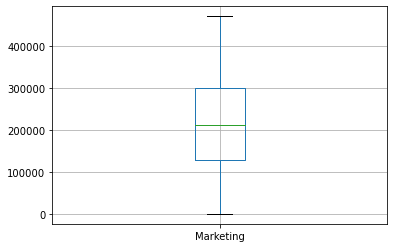

In [55]:
data.boxplot(column = ['Marketing'])

In [56]:
data.skew()

RD                0.164002
Administration   -0.489025
Marketing        -0.046472
Profit            0.023291
dtype: float64

In [57]:
data.kurtosis()#no outliers

RD               -0.761465
Administration    0.225071
Marketing        -0.671701
Profit           -0.063859
dtype: float64

In [58]:
data = pd.get_dummies(data,columns = ['State'])

In [59]:
data

,RD,Administration,Marketing,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [60]:
data.corr()

,RD,Administration,Marketing,Profit,State_California,State_Florida,State_New York
RD,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


In [61]:
model = smf.ols('Profit~RD+Administration+Marketing',data = data).fit()

In [62]:
np.round(model.pvalues,4)

Intercept         0.0000
RD                0.0000
Administration    0.6018
Marketing         0.1047
dtype: float64

In [63]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [64]:
a_model = smf.ols('Profit~Administration',data = data).fit()
np.round(a_model.pvalues,5)

Intercept         0.00382
Administration    0.16222
dtype: float64

In [65]:
m_model = smf.ols('Profit~Marketing',data = data).fit()
np.round(m_model.pvalues,5)

Intercept    0.0
Marketing    0.0
dtype: float64

In [66]:
am_model = smf.ols('Profit~Marketing+Administration',data = data).fit()
np.round(am_model.pvalues,5)

Intercept         0.25893
Marketing         0.00000
Administration    0.01729
dtype: float64

In [67]:
rsq_m = smf.ols('Marketing~Administration + RD',data = data).fit().rsquared
vif_m = 1/(1-rsq_m)

rsq_a = smf.ols('Administration~Marketing + RD',data = data).fit().rsquared
vif_a = 1/(1-rsq_a)

rsq_rd = smf.ols('RD~Administration+Marketing',data = data).fit().rsquared
vif_rd = 1/(1-rsq_rd)

d1={'Variables':['RD','Administration','Marketing'],'Vif':[vif_m,vif_a,vif_rd]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RD,2.326773
1,Administration,1.175091
2,Marketing,2.468903


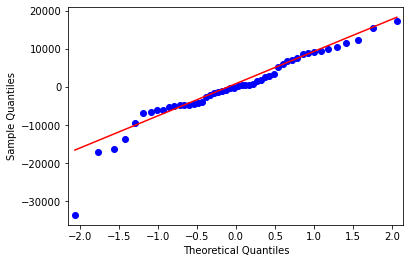

In [68]:
qqplot = sm.qqplot(model.resid,line = 'q')

In [69]:
def get_standardized_values(vals):
    return(vals - vals.mean())/vals.std()

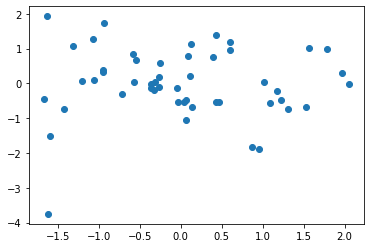

In [70]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.show()

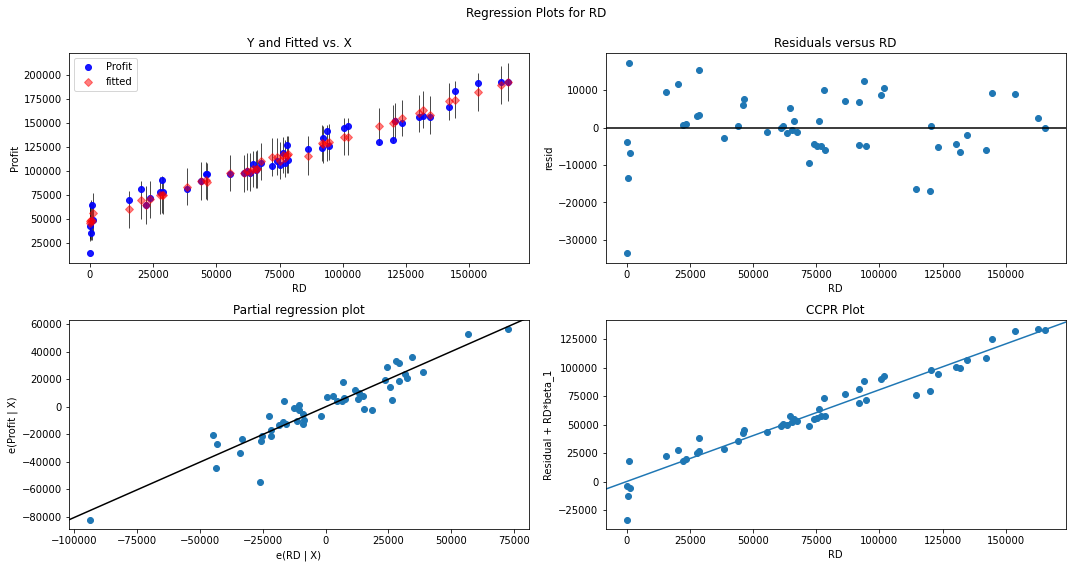

In [71]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RD',fig=fig)
plt.show()

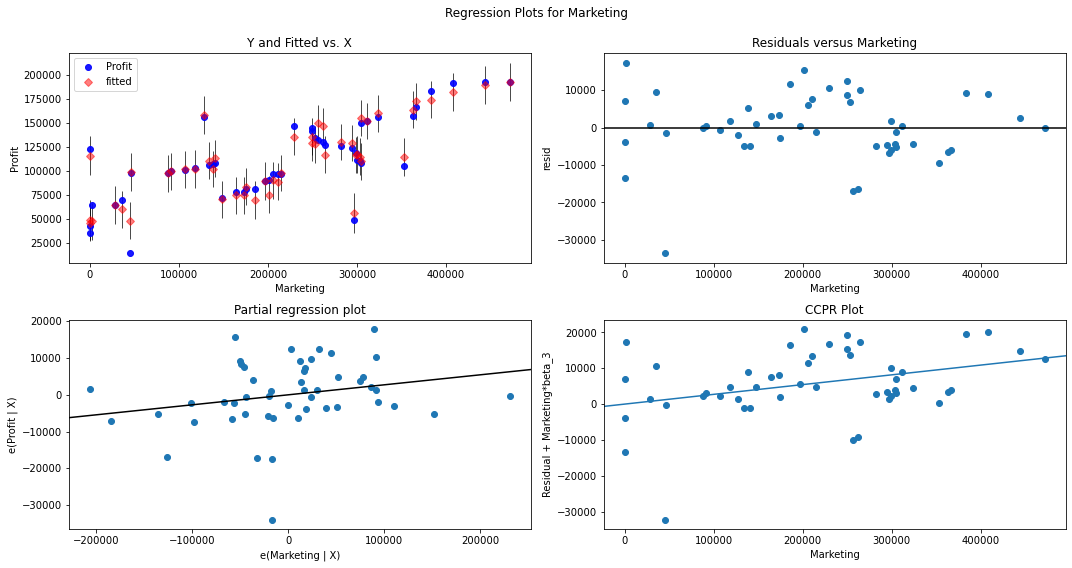

In [72]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Marketing',fig=fig)
plt.show()


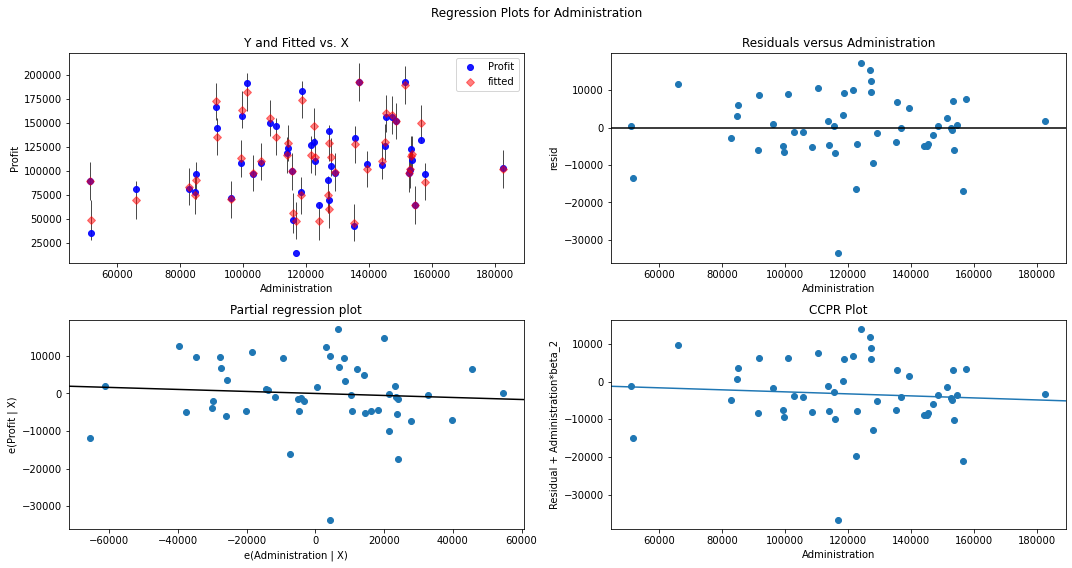

In [73]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

In [74]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

<StemContainer object of 3 artists>

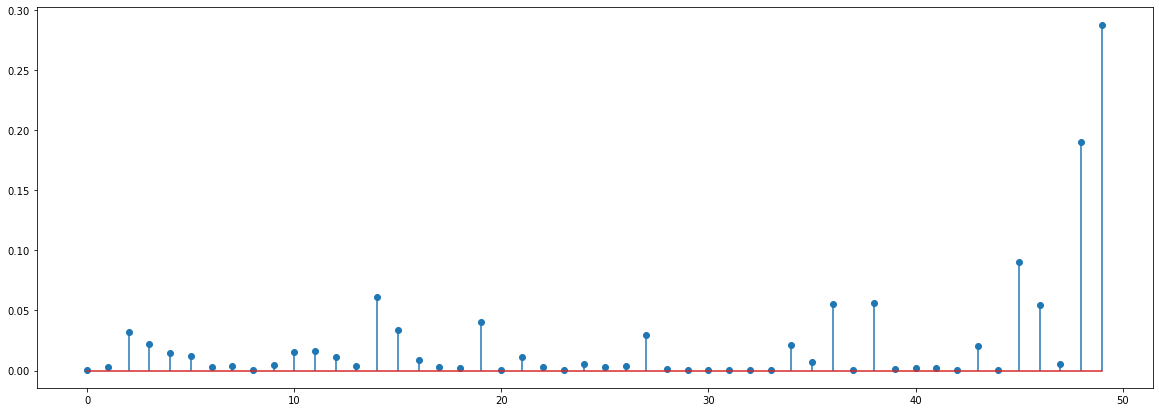

In [75]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,5))

In [76]:
np.argmax(c),np.max(c)

(49, 0.28808229275432634)

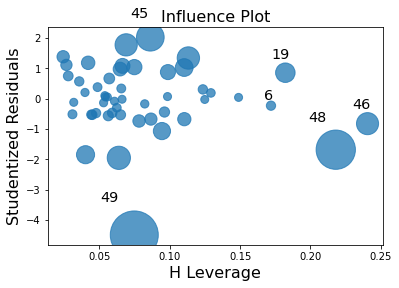

In [77]:
influence_plot(model)
plt.show()

In [78]:
data[data.index.isin([49,48])]

,RD,Administration,Marketing,Profit,State_California,State_Florida,State_New York
48,542.05,51743.15,0.00,35673.41,0,0,1
49,0.00,116983.80,45173.06,14681.40,1,0,0


In [79]:
data1 = data.drop(data.index[[49,48]],axis = 0).reset_index()

In [80]:
data1 = data1.drop(['index'],axis = 1)

In [81]:
model_m = smf.ols('Profit~Marketing+RD',data = data1).fit()

In [82]:
model_m.rsquared,model_m.aic

(0.9609119875752478, 994.8864429429412)

In [83]:
model_a = smf.ols('Profit~Administration+RD',data = data1).fit()

In [84]:
model_a.rsquared,model_a.aic

(0.9613542664192156, 994.3402293693792)

In [85]:
#model_a was chosen as it has better r squared value and lower value of aic

In [86]:
model_influence_a = model_a.get_influence()
(c_a,_) = model_influence_a.cooks_distance

<StemContainer object of 3 artists>

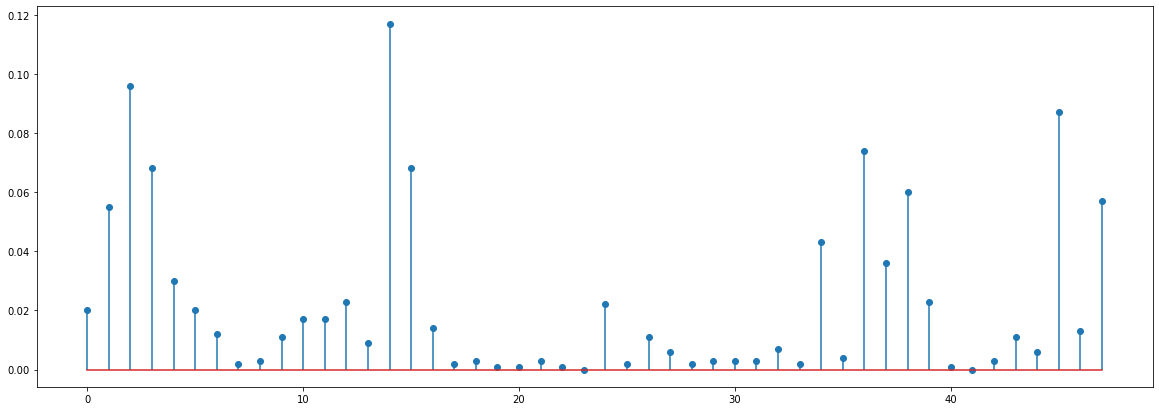

In [87]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c_a,3))

In [88]:
np.argmax(c_a),np.max(c_a)

(14, 0.1165446497672248)

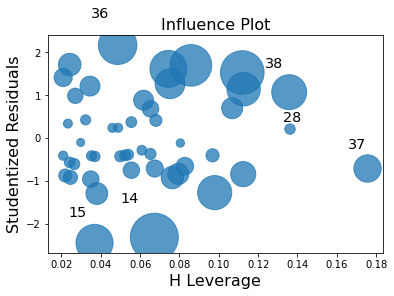

In [89]:
influence_plot(model_a)
plt.show()

In [90]:
data[data.index.isin([14])]#nothing seems abnormal here

,RD,Administration,Marketing,Profit,State_California,State_Florida,State_New York
14,119943.24,156547.42,256512.92,132602.65,0,1,0


In [91]:
#No more rows were dropped as the cooks distance is already below 0.5 and the rows with
#high influence seems to have important information

In [92]:
new_data=pd.DataFrame({'RD':70000,"Administration":90000,"Marketing":140000},index=[0])
new_data

,RD,Administration,Marketing
0,70000,90000,140000


In [93]:
model_a.predict(new_data)

0    112803.12255
dtype: float64

In [94]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,model_a.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961354
